In [8]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math

import utility.io_utility as io
import utility.animation_utility as anim

In [9]:
def burning(result):
    return np.sum(result[:,:,:,1], axis = (1,2))

In [10]:
def burned(result):
    return np.sum(result[:,:,:,5], axis = (1,2))

In [11]:
def burningPlusBurned(result):
    tmp = result[:,:,:,1] * result[:,:,:,5]
    return burning(result) + burned(result) - np.sum(np.where(tmp == 1, 1, 0), axis = (1,2)) # Abziehen was brennt + schon gebrannt hat

In [12]:
def derivative(array):
    x = np.arange(array.size)
    y = array
    y_ = np.diff(y) / np.diff(x)
    x_ = (x[:-1] + x[1:]) / 2
    return y_

In [13]:
def burning_radius(result):
    return np.sqrt(burningPlusBurned(result)/np.pi)

In [14]:
def schwerpunkt(result):
    out = []
    t = 0
    while t < result[:,0,0,1].size:
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x, y) = np.where(tmp == 1)
        out.append(np.array([np.sum(x)/burningPlusBurned(result)[t], np.sum(y)/burningPlusBurned(result)[t]]))
        t = t+1
    
    return np.array(out)
#schwerpunkt(path)[t][y=1 x=0]

In [15]:
def schwerpunkt_end(result):
    out = []
    t = 99
    tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
    (x, y) = np.where(tmp == 1)
    out.append(np.array([np.sum(x)/burningPlusBurned(result)[t], np.sum(y)/burningPlusBurned(result)[t]]))
    
    return np.array(out)
#schwerpunkt(path)[t][y=1 x=0]

In [45]:
def com(result):
    out = []
    for i in range (len(result)):
        out.append(schwerpunkt_end(result[i]))
    
    x = [out[i][0][0] for i in range (len(result))]
    y = [out[i][0][1] for i in range (len(result))]
    return np.array([x,y])

In [18]:
#gibt alle koordinaten der Brenndenen Zellen an
def koord(result):
    out = []
    for t in np.arange(result[:,0,0,1].size):
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x,y) = np.where(tmp ==1)
        out.append([x,y])
    #out[t][0 = x 1 = y][Zelle]  
    return out

In [19]:
def gradius(result,t):
    k = koord(result)
    s = schwerpunkt(result)
    time = np.arange(result[:,0,0,1].size)
    tmp = []
    
    
    for x in np.arange(k[t][0].size):      
        y = (k[t][0][x]-s[t][0])**2 + (k[t][1][x]-s[t][1])**2
        tmp.append([y])
        out = math.sqrt(np.sum(tmp)/len(tmp))
    return out

In [20]:
def radius(result):
    out = np.zeros([result[:,0,0,1].size])
    t = 0
    while t < result[:,0,0,1].size:
        out[t] = gradius(result,t)
        t = t + 1
    return out

In [21]:
def gyration(result):
    return radius(result)/burning_radius(result)

In [22]:
def plot(datas, function_index, color):
    names = ["Brandfläche","Brandgeschwindigkeit","Radius","Radiusänderung"]
    for d in datas:
        y = d[function_index]
        x = np.arange(y.size)
        plt.plot(x, y, color, label = "Model")
    plt.xlabel("Zeit [h]")
    plt.ylabel(names[function_index])
    #plt.legend()
    plt.grid()

In [23]:
def evaluate(results):
    out = []
    
    
    for r in results:
        bpb = burningPlusBurned(r)
        dbpb = derivative(bpb)
        rad = burning_radius(r)
        drad = derivative(rad)
        com = schwerpunkt_end(r)
        #grad = radius(r)
        #gyprad =  grad/rad
        out.append(np.array([bpb,dbpb,rad,drad,com],dtype=object))
    
    return out

In [24]:
def mean_values(evaluation):
    out = []
    for e in evaluation:
        tmp = []
        for j in e:
            tmp.append(np.mean(j))
        out.append(tmp)
    return out

In [25]:
def mean_func(means,index_value):
    out = []
    for m in means:
        out.append(m[index_value])
    return out

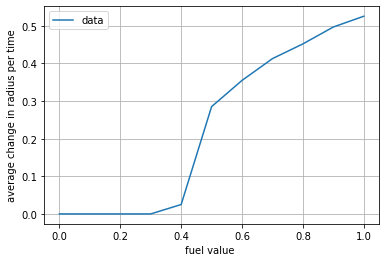

In [75]:
y = mean_func(mean_values(evaluate(io.read("data/result_output_var_fuel"))),3)
x = 0.1 *np.arange(len(y))
plt.plot(x, y, "C0", label = "data")

plt.xlabel("fuel value ")
plt.ylabel("average change in radius per time")
plt.legend()
plt.grid()



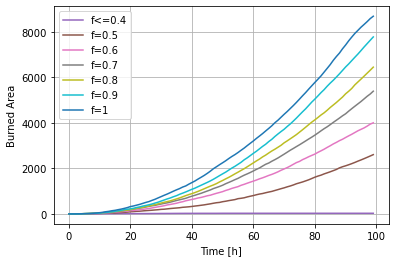

In [62]:
path = "data/result_output_var_fuel"

"""y = evaluate(io.read(path))[0][0]
x = np.arange(y.size)
pl
y = evaluate(io.read(path))[1][0]
x = np.arange(y.size)
plt.plot(x, y, "C1", label = "f=0.1")

y = evaluate(io.read(path))[2][0]
x = np.arange(y.size)
plt.plot(x, y, "C2", label = "f=0.2")

y = evaluate(io.read(path))[3][0]
x = np.arange(y.size)
plt.plot(x, y, "C3", label = "f=0.3")"""

y = evaluate(io.read(path))[4][0]
x = np.arange(y.size)
plt.plot(x, y, "C4", label = "f<=0.4")

y = evaluate(io.read(path))[5][0]
x = np.arange(y.size)
plt.plot(x, y, "C5", label = "f=0.5")

y = evaluate(io.read(path))[6][0]
x = np.arange(y.size)
plt.plot(x, y, "C6", label = "f=0.6")

y = evaluate(io.read(path))[7][0]
x = np.arange(y.size)
plt.plot(x, y, "C7", label = "f=0.7")

y = evaluate(io.read(path))[8][0]
x = np.arange(y.size)
plt.plot(x, y, "C8", label = "f=0.8")

y = evaluate(io.read(path))[9][0]
x = np.arange(y.size)
plt.plot(x, y, "C9", label = "f=0.9")

y = evaluate(io.read(path))[10][0]
x = np.arange(y.size)
plt.plot(x, y, "C10", label = "f=1")

plt.xlabel("Time [h]")
plt.ylabel("Burned Area")
plt.legend()
plt.grid()

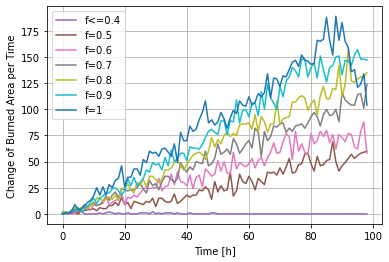

In [63]:
path = "data/result_output_var_fuel"

"""y = evaluate(io.read(path))[0][1]
x = np.arange(y.size)
pl
y = evaluate(io.read(path))[1][1]
x = np.arange(y.size)
plt.plot(x, y, "C1", label = "f=0.1")

y = evaluate(io.read(path))[2][1]
x = np.arange(y.size)
plt.plot(x, y, "C2", label = "f=0.2")

y = evaluate(io.read(path))[3][1]
x = np.arange(y.size)
plt.plot(x, y, "C3", label = "f=0.3")"""

y = evaluate(io.read(path))[4][1]
x = np.arange(y.size)
plt.plot(x, y, "C4", label = "f<=0.4")

y = evaluate(io.read(path))[5][1]
x = np.arange(y.size)
plt.plot(x, y, "C5", label = "f=0.5")

y = evaluate(io.read(path))[6][1]
x = np.arange(y.size)
plt.plot(x, y, "C6", label = "f=0.6")

y = evaluate(io.read(path))[7][1]
x = np.arange(y.size)
plt.plot(x, y, "C7", label = "f=0.7")

y = evaluate(io.read(path))[8][1]
x = np.arange(y.size)
plt.plot(x, y, "C8", label = "f=0.8")

y = evaluate(io.read(path))[9][1]
x = np.arange(y.size)
plt.plot(x, y, "C9", label = "f=0.9")

y = evaluate(io.read(path))[10][1]
x = np.arange(y.size)
plt.plot(x, y, "C10", label = "f=1")


plt.xlabel("Time [h]")
plt.ylabel("Change of Burned Area per Time")
plt.legend()
plt.grid()

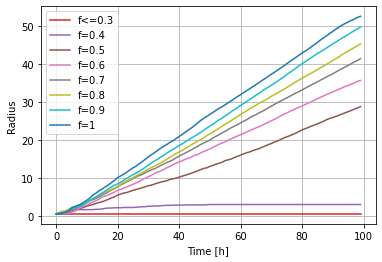

In [56]:
path = "data/result_output_var_fuel"

"""y = evaluate(io.read(path))[0][2]
x = np.arange(y.size)
plt.plot(x, y, "C0", label = "f=0")

y = evaluate(io.read(path))[1][2]
x = np.arange(y.size)
plt.plot(x, y, "C1", label = "f=0.1")

y = evaluate(io.read(path))[2][2]
x = np.arange(y.size)
plt.plot(x, y, "C2", label = "f=0.2")"""

y = evaluate(io.read(path))[3][2]
x = np.arange(y.size)
plt.plot(x, y, "C3", label = "f<=0.3")

y = evaluate(io.read(path))[4][2]
x = np.arange(y.size)
plt.plot(x, y, "C4", label = "f=0.4")

y = evaluate(io.read(path))[5][2]
x = np.arange(y.size)
plt.plot(x, y, "C5", label = "f=0.5")

y = evaluate(io.read(path))[6][2]
x = np.arange(y.size)
plt.plot(x, y, "C6", label = "f=0.6")

y = evaluate(io.read(path))[7][2]
x = np.arange(y.size)
plt.plot(x, y, "C7", label = "f=0.7")

y = evaluate(io.read(path))[8][2]
x = np.arange(y.size)
plt.plot(x, y, "C8", label = "f=0.8")

y = evaluate(io.read(path))[9][2]
x = np.arange(y.size)
plt.plot(x, y, "C9", label = "f=0.9")

y = evaluate(io.read(path))[10][2]
x = np.arange(y.size)
plt.plot(x, y, "C10", label = "f=1")

plt.xlabel("Time [h]")
plt.ylabel("Radius")
plt.legend()
plt.grid()

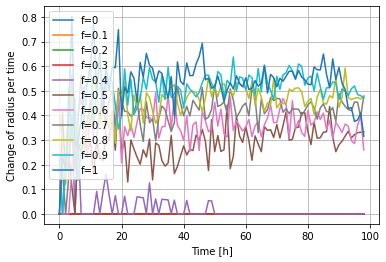

In [57]:
path = "data/result_output_var_fuel"

y = evaluate(io.read(path))[0][3]
x = np.arange(y.size)
plt.plot(x, y, "C0", label = "f=0")

y = evaluate(io.read(path))[1][3]
x = np.arange(y.size)
plt.plot(x, y, "C1", label = "f=0.1")

y = evaluate(io.read(path))[2][3]
x = np.arange(y.size)
plt.plot(x, y, "C2", label = "f=0.2")

y = evaluate(io.read(path))[3][3]
x = np.arange(y.size)
plt.plot(x, y, "C3", label = "f=0.3")

y = evaluate(io.read(path))[4][3]
x = np.arange(y.size)
plt.plot(x, y, "C4", label = "f=0.4")

y = evaluate(io.read(path))[5][3]
x = np.arange(y.size)
plt.plot(x, y, "C5", label = "f=0.5")

y = evaluate(io.read(path))[6][3]
x = np.arange(y.size)
plt.plot(x, y, "C6", label = "f=0.6")

y = evaluate(io.read(path))[7][3]
x = np.arange(y.size)
plt.plot(x, y, "C7", label = "f=0.7")

y = evaluate(io.read(path))[8][3]
x = np.arange(y.size)
plt.plot(x, y, "C8", label = "f=0.8")

y = evaluate(io.read(path))[9][3]
x = np.arange(y.size)
plt.plot(x, y, "C9", label = "f=0.9")

y = evaluate(io.read(path))[10][3]
x = np.arange(y.size)
plt.plot(x, y, "C10", label = "f=1")

plt.xlabel("Time [h]")
plt.ylabel("Change of radius per time")
plt.legend()
plt.grid()

(0.0, 100.0)

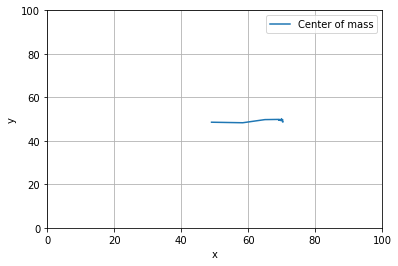

In [60]:
y = com(io.read("data/result_output_var_windy"))[0]
x = com(io.read("data/result_output_var_windy"))[1]
plt.plot(x, y, "C10", label = "Center of mass")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,100)